In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import seaborn as sns
import numpy as np
import math

C:\Users\yuto1\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cu_path = os.getcwd()
file  = cu_path + "/london_merged.csv"
df = pd.read_csv(file , encoding = "utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index("timestamp")

In [3]:
display(df)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


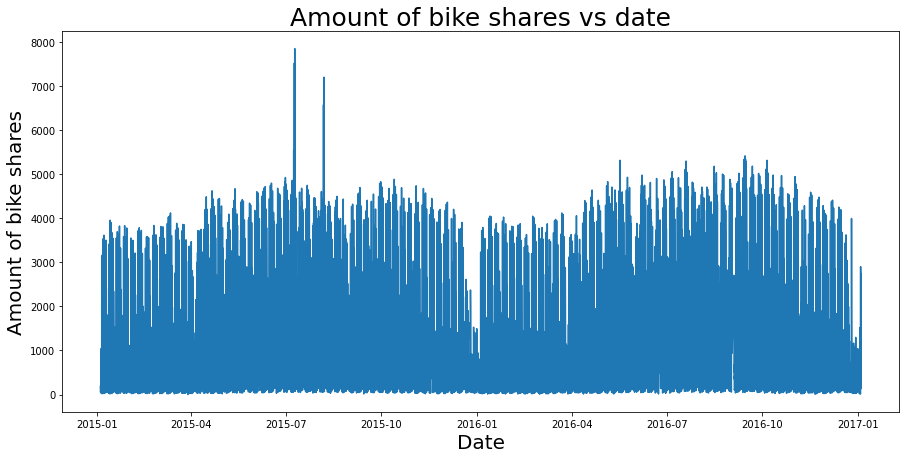

In [4]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=df.index, y=df.cnt,data=df)
ax.set_title("Amount of bike shares vs date", fontsize=25)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

##### Preprocess

In [5]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['weekofyear'] = df.index.weekofyear
df['month'] = df.index.month

# df = pd.get_dummies(data=df, columns=['hour'])
# df = pd.get_dummies(data=df, columns=['dayofweek'])
# df = pd.get_dummies(data=df, columns=['weekofyear'])
# df = pd.get_dummies(data=df, columns=['month'])

C:\Users\yuto1\AppData\Local\Temp/ipykernel_11556/399677633.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


In [6]:
training_data_len = math.ceil(len(df) *.9)
testing_data_len = len(df) - training_data_len

time_steps = 24
df_train, df_test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]

In [7]:
Robust_scale = RobustScaler()

In [8]:
train_trans = df_train[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
df_train.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=Robust_scale.fit_transform(train_trans)

C:\Users\yuto1\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [9]:
test_trans = df_test[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
df_test.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=Robust_scale.fit_transform(test_trans)

C:\Users\yuto1\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [10]:
df_train['cnt'] = Robust_scale.fit_transform(df_train[['cnt']])
df_test['cnt'] = Robust_scale.fit_transform(df_test[['cnt']])

C:\Users\yuto1\AppData\Local\Temp/ipykernel_11556/1207697154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cnt'] = Robust_scale.fit_transform(df_train[['cnt']])
C:\Users\yuto1\AppData\Local\Temp/ipykernel_11556/1207697154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cnt'] = Robust_scale.fit_transform(df_test[['cnt']])


In [11]:
df_train.to_numpy()
df_test.to_numpy()

array([[ 0.24331551, -1.725     , -0.94285714, ...,  5.        ,
        42.        , 10.        ],
       [ 0.49465241, -1.6875    , -0.91746032, ...,  5.        ,
        42.        , 10.        ],
       [ 0.93761141, -1.6375    , -0.88571429, ...,  5.        ,
        42.        , 10.        ],
       ...,
       [-0.34402852, -0.5       , -0.66666667, ...,  1.        ,
         1.        ,  1.        ],
       [-0.44474153, -0.5       , -0.66666667, ...,  1.        ,
         1.        ,  1.        ],
       [-0.52049911, -0.6       , -0.73333333, ...,  1.        ,
         1.        ,  1.        ]])

In [12]:
print(df_train.isnull().sum())

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
hour            0
dayofweek       0
weekofyear      0
month           0
dtype: int64


In [13]:
print(df_test.isnull().sum())

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
hour            0
dayofweek       0
weekofyear      0
month           0
dtype: int64


In [14]:
time_steps = 24
#Split the data into x_train and y_train data sets
X_train_window = []
y_train_window = []

for i in range(len(df_train) - time_steps):
    X_train_window.append(df_train.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    y_train_window.append(df_train.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
X_train_window = np.array(X_train_window)
y_train_window = np.array(y_train_window)

In [15]:
X_train_window.shape

(15649, 24, 12)

In [16]:
y_train_window.shape

(15649,)

In [17]:
X_test_window = []
y_test = df.loc[:,'cnt'].iloc[training_data_len:len(df)]
# y_test_window = []

for i in range(len(df_test) - time_steps):
    X_test_window.append(df_test.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    # y_test_window.append(y_test.iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
X_test_window = np.array(X_test_window)
# y_test_window = np.array(y_test_window)

In [18]:
X_test_window .shape

(1741, 24, 12)

In [19]:
y_test.shape

(1741,)

##### LSTM model with tensorflow

In [20]:
#Build the LSTM network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(units=50,input_shape=(X_train_window.shape[1], X_train_window.shape[2]))))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
losses = model.fit(X_train_window, y_train_window,
                   validation_split=0.15, shuffle=True,
                   batch_size=200,
                   epochs=30,
                   )

Epoch 1/30
67/67 [==============================] - 7s 57ms/step - loss: 0.4334 - val_loss: 0.4330
Epoch 2/30
67/67 [==============================] - 3s 41ms/step - loss: 0.3283 - val_loss: 0.4099
Epoch 3/30
67/67 [==============================] - 3s 44ms/step - loss: 0.2930 - val_loss: 0.3803
Epoch 4/30
67/67 [==============================] - 3s 43ms/step - loss: 0.2735 - val_loss: 0.3451
Epoch 5/30
67/67 [==============================] - 3s 44ms/step - loss: 0.2387 - val_loss: 0.3088
Epoch 6/30
67/67 [==============================] - 3s 40ms/step - loss: 0.1787 - val_loss: 0.1847
Epoch 7/30
67/67 [==============================] - 4s 54ms/step - loss: 0.1243 - val_loss: 0.1256
Epoch 8/30
67/67 [==============================] - 4s 58ms/step - loss: 0.0985 - val_loss: 0.0972
Epoch 9/30
67/67 [==============================] - 4s 52ms/step - loss: 0.0816 - val_loss: 0.0903
Epoch 10/30
67/67 [==============================] - 5s 69ms/step - loss: 0.0741 - val_loss: 0.0758
Epoch 11/

Text(0, 0.5, 'mse score')

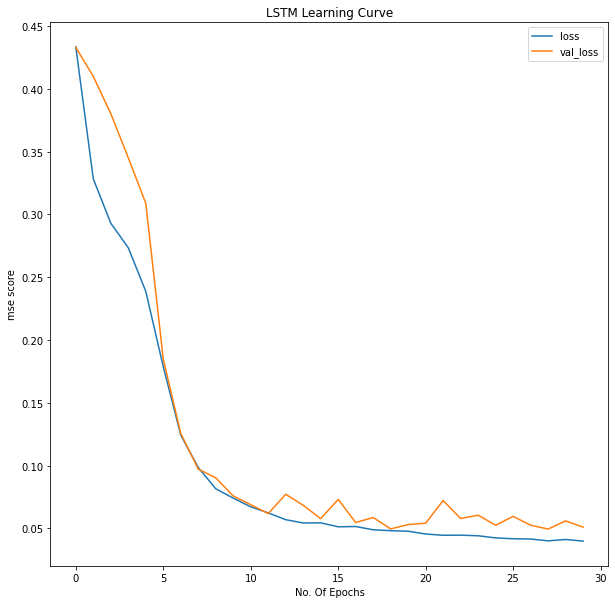

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(losses.history["loss"],label="loss")
plt.plot(losses.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.title("LSTM Learning Curve")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

Text(0, 0.5, 'Prediction Value')

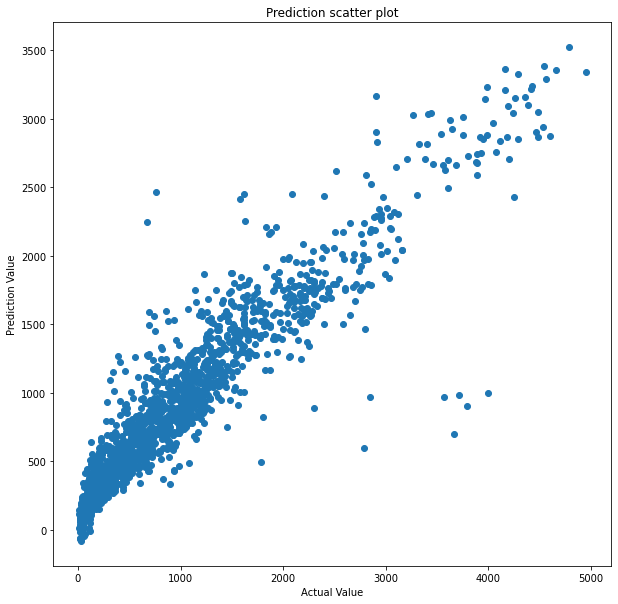

In [27]:
pred = model.predict(X_test_window)
pred = Robust_scale.inverse_transform(pred)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, pred)
plt.title("Prediction scatter plot")
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")

In [24]:
# correlation between prediction value and actual value
r2 = r2_score(y_test, pred)
r2

0.8255758550384646

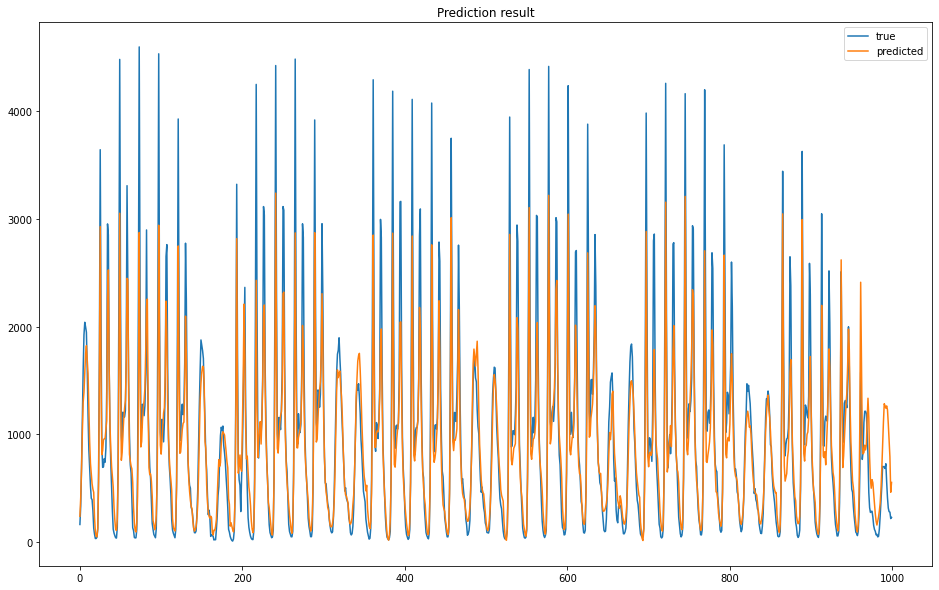

In [28]:
plt.figure(figsize=(16, 10))
plt.title("Prediction result")
plt.plot(y_test.values[500:1500], label='true')
plt.plot(pred[500:1500], label='predicted')
plt.legend()